<a href="https://colab.research.google.com/github/Y-Srivaishnavi/ais2101_int_sys/blob/main/assignment2/TSP_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Subsetting the Data

In [ ]:
djib_subset = np.array([
[12058.333300, 42195.555600],
[12149.444400,42477.500000],
[12286.944400, 43355.555600],
[12300.000000, 42433.333300],
[12355.833300, 43156.388900],
[12363.333300, 43189.166700],
[12372.777800, 42711.388900],
[12386.666700, 43334.722200],
[12421.666700, 42895.555600],
[12645.000000, 42973.333300]])

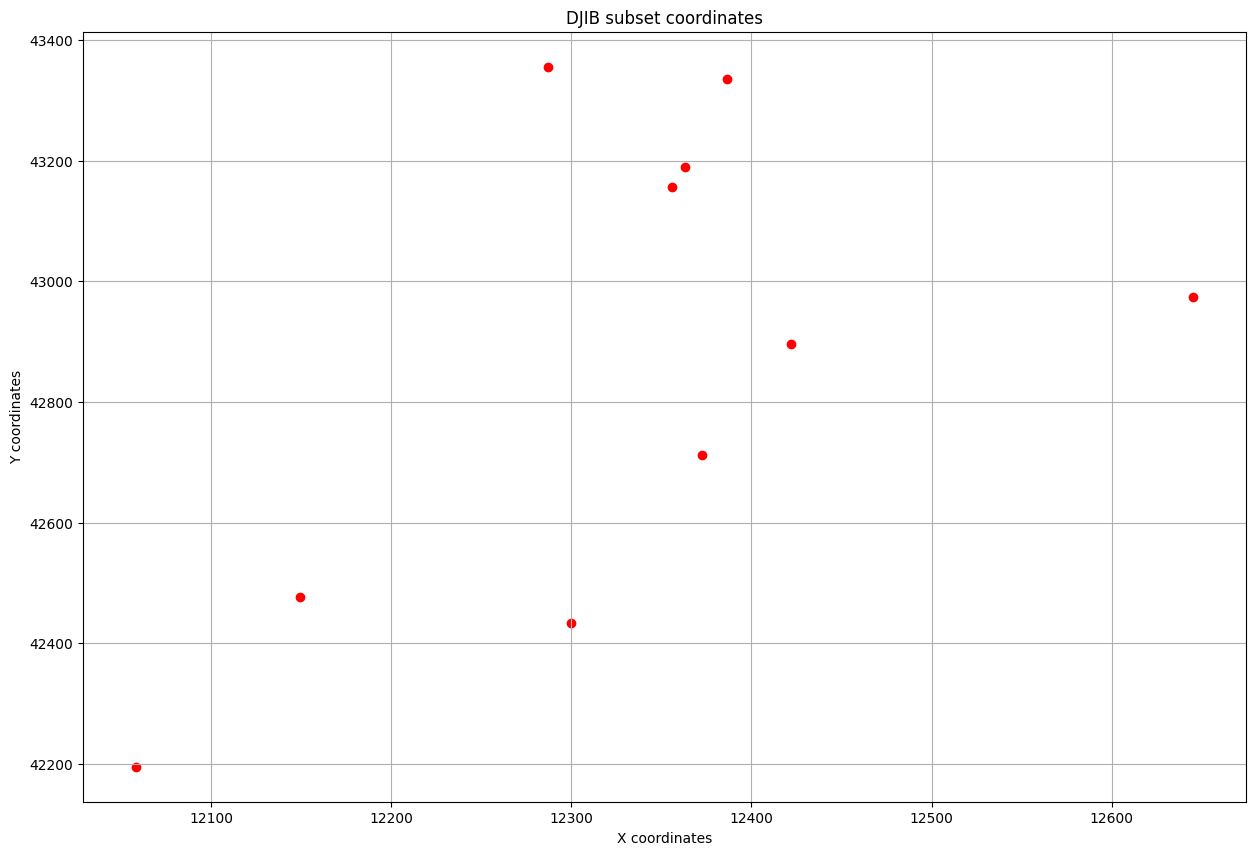

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(djib_subset[:, 0], djib_subset[:, 1], label='DJIB', color='red')
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.title("DJIB subset coordinates")
plt.grid(True)
plt.show()

In [ ]:
djib = np.array([[11003.611100, 42102.500000],
 [11108.611100, 42373.888900],
 [11133.333300, 42885.833300],
 [11155.833300, 42712.500000],
 [11183.333300, 42933.333300],
 [11297.500000, 42853.333300],
 [11310.277800, 42929.444400],
 [11416.666700, 42983.333300],
 [11423.888900, 43000.277800],
 [11438.333300, 42057.222200],
 [11461.111100, 43252.777800],
 [11485.555600, 43187.222200],
 [11503.055600, 42855.277800],
 [11511.388900, 42106.388900],
 [11522.222200, 42841.944400],
 [11569.444400, 43136.666700],
 [11583.333300, 43150.000000],
 [11595.000000, 43148.055600],
 [11600.000000, 43150.000000],
 [11690.555600, 42686.666700],
 [11715.833300, 41836.111100],
 [11751.111100, 42814.444400],
 [11770.277800, 42651.944400],
 [11785.277800, 42884.444400],
 [11822.777800, 42673.611100],
 [11846.944400, 42660.555600],
 [11963.055600, 43290.555600],
 [11973.055600, 43026.111100],
 [12058.333300, 42195.555600],
 [12149.444400, 42477.500000],
 [12286.944400, 43355.555600],
 [12300.000000, 42433.333300],
 [12355.833300, 43156.388900],
 [12363.333300, 43189.166700],
 [12372.777800, 42711.388900],
 [12386.666700, 43334.722200],
 [12421.666700, 42895.555600],
 [12645.000000, 42973.333300]]
)

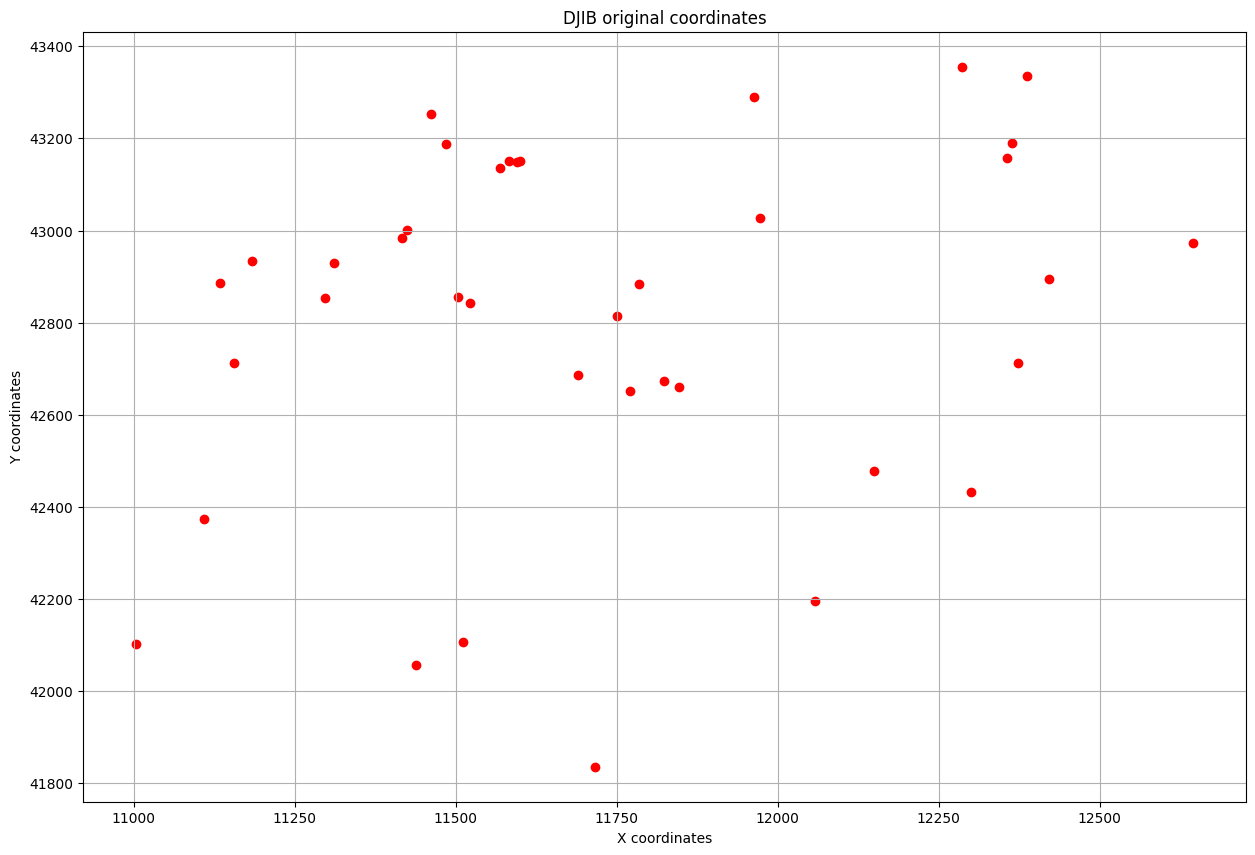

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(djib[:, 0], djib[:, 1], label='DJIB', color='red')
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.title("DJIB original coordinates")
plt.grid(True)
plt.show()

# Functions for mutation and crossover

In [ ]:
from typing import List, Iterable

In [ ]:
import random as rand

In [ ]:
def order1_X(parent1:List[int], parent2:List[int]):
  size = len(parent2)
  start = rand.randint(0, size - 2)
  end = rand.randint(start + 1, size - 1)

  def fill_child(main_parent, other_parent):
    child = [-1] * size
    par_set = set(main_parent[start:end+1])

    j = 0
    for i in range(size):
      if i < start or i > end:
        while other_parent[j] in par_set:
          j += 1
        child[i] = other_parent[j]
        j += 1
      else:
        child[i] = main_parent[i]

    return child

  child1 = fill_child(parent1, parent2)
  child2 = fill_child(parent2, parent1)

  return child1, child2

In [ ]:
def twors_mutation(permutation:List[int])->List[int]:
  for _ in range(5):  # max tries for algo to work is 5
    i, j = rand.sample(range(len(permutation)), 2)
    if i != j:
      permutation[i], permutation[j] = permutation[j], permutation[i]
      break
  return permutation

In [ ]:
#Test for crossover
parent1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
parent2 = [9, 8, 7, 6, 5, 4, 3, 2, 1]

for _ in range(5):
  print(order1_X(parent1, parent2))

#Update: Works as expected

([7, 6, 5, 4, 3, 2, 1, 8, 9], [3, 4, 5, 6, 7, 8, 9, 2, 1])
([3, 2, 1, 4, 5, 6, 7, 8, 9], [7, 8, 9, 6, 5, 4, 3, 2, 1])
([9, 6, 5, 4, 3, 2, 7, 8, 1], [1, 4, 5, 6, 7, 8, 3, 2, 9])
([5, 4, 3, 2, 1, 6, 7, 8, 9], [5, 6, 7, 8, 9, 4, 3, 2, 1])
([7, 6, 5, 4, 3, 2, 1, 8, 9], [3, 4, 5, 6, 7, 8, 9, 2, 1])


In [ ]:
#Test for mutation
child1, child2 = order1_X(parent1, parent2)
print(child1, child2, end='\n\n')
print(twors_mutation(child1))
print(twors_mutation(child2))

#Works as expected

[1, 2, 3, 4, 5, 6, 7, 9, 8] [9, 8, 7, 6, 5, 4, 3, 1, 2]

[1, 3, 2, 4, 5, 6, 7, 9, 8]
[9, 8, 7, 6, 1, 4, 3, 5, 2]


# GA implementation

In [ ]:
def dist_two_cities(city1_idx:int, city2_idx:int)->float:
    """
    Calculating Euclidean distance between two cities
    """
    return np.sqrt(np.sum((np.array(djib_subset[city1_idx]) - np.array(djib_subset[city2_idx]))**2))

In [ ]:
def dist_permutation(permutation:List[int])->int:
    """
    Calculating the total distance traveled by one possible solution (1 permutation)
    """
    total_dist = 0
    for i in range(0, len(permutation)-1):
        total_dist += dist_two_cities(permutation[i], permutation[i+1])
    total_dist += dist_two_cities(permutation[-1], permutation[0])

    return total_dist

In [ ]:
import itertools

def init_population(cities_list:List[List[float]], n_population = 4)->List[List[float]]:
    all_permutations = list(itertools.permutations(range(len(cities_list))))
    sampled_permutations = rand.sample(all_permutations, n_population)
    return [list(perm) for perm in sampled_permutations]

In [ ]:
def fitness_prob(population:List[List[int]])->np.ndarray:
    """
    Calculating the fitness probability
    """
    total_dists = [0]*len(population)
    for i in range (0, len(population)):
            total_dists[i] = dist_permutation(population[i])

    max_pop_cost = max(total_dists)
    pop_fitness = max_pop_cost - np.array(total_dists)
    pop_fitness_sum = sum(pop_fitness)
    pop_fitness_probs = pop_fitness / pop_fitness_sum

    return pop_fitness_probs

In [ ]:
def roulette_wheel(population, fitness_probs:List[float]):
    """
    Implement roulette wheel selection.
    • Rank chromosomes in list
    • Give a weight according to fitness/ability to minimise cost
    • High fitness, high weight
    • Spin wheel and randomly draw chromosomes
    • Fit chromosomes have higher probabiliy of getting picked
    """
    probs_cumsum = np.cumsum(fitness_probs)
    bool_prob_array = probs_cumsum < np.random.uniform(0,1,1)
    selected_individual_index = len(bool_prob_array[bool_prob_array == True]) - 1

    return population[selected_individual_index]

In [ ]:
def genetic_algorithm(n_population=10, n_generations=100, mutation_rate=0.2):
    """Solve TSP using Genetic Algorithm."""
    population = init_population(djib_subset, n_population)

    global_best = float('inf')
    global_best_solution = None
    best_gen = -1

    for gen in range(n_generations):
        fitness_probs = fitness_prob(population)
        new_population = []

        while len(new_population) < n_population:
            # Select parents
            parent1 = roulette_wheel(population, fitness_probs)
            for _ in range(5):
              parent2 = roulette_wheel(population, fitness_probs)
              if parent2 != parent1:
                  break

            # Apply crossover
            child1, child2 = order1_X(parent1, parent2)

            # Apply mutation with probability
            if rand.random() < mutation_rate:
                child1 = twors_mutation(child1)
            if rand.random() < mutation_rate:
                child2 = twors_mutation(child2)

            new_population.extend([child1, child2])

        # Ensure population size remains constant
        population = new_population[:n_population]

        # Track best solution
        best_solution = min(population, key=dist_permutation)
        best_distance = dist_permutation(best_solution)

        if best_distance < global_best:
            global_best = best_distance
            global_best_solution = best_solution
            best_gen = gen

        # Print progress
        if gen % 10 == 0:
            print(f"Generation {gen}: Best Distance = {best_distance:.2f}")

    # Final best solution
    return global_best_solution, global_best, best_gen

# Run the simulation
best_route, best_dist, best_gen = genetic_algorithm()

print(f"\nBest TSP Route Found: {best_route}")
print(f"Best Distance: {best_dist}")
print(f"Obtained at Generation: {best_gen}")


Generation 0: Best Distance = 4152.07
Generation 10: Best Distance = 5620.83
Generation 20: Best Distance = 4814.02
Generation 30: Best Distance = 4728.03
Generation 40: Best Distance = 4808.62
Generation 50: Best Distance = 3355.63
Generation 60: Best Distance = 3833.92
Generation 70: Best Distance = 5209.92
Generation 80: Best Distance = 4565.05
Generation 90: Best Distance = 3970.95

Best TSP Route Found: [7, 5, 8, 9, 3, 1, 0, 6, 4, 2]
Best Distance: 3139.3140700218055
Obtained at Generation: 57


In [ ]:
for _ in range(5):
  best_route, best_dist, best_gen = genetic_algorithm(10, 200)

  print(f"\nBest TSP Route Found: {best_route}")
  print(f"Best Distance: {best_dist}")
  print(f"Obtained at Generation: {best_gen}")

Generation 0: Best Distance = 4870.22
Generation 10: Best Distance = 4224.64
Generation 20: Best Distance = 4095.79
Generation 30: Best Distance = 4191.93
Generation 40: Best Distance = 3811.96
Generation 50: Best Distance = 3705.19
Generation 60: Best Distance = 4309.63
Generation 70: Best Distance = 4083.41
Generation 80: Best Distance = 3901.19
Generation 90: Best Distance = 3665.14
Generation 100: Best Distance = 4782.23
Generation 110: Best Distance = 3376.08
Generation 120: Best Distance = 4218.78
Generation 130: Best Distance = 4334.01
Generation 140: Best Distance = 4753.58
Generation 150: Best Distance = 4914.91
Generation 160: Best Distance = 4124.15
Generation 170: Best Distance = 4178.33
Generation 180: Best Distance = 4195.80
Generation 190: Best Distance = 3738.57

Best TSP Route Found: [4, 9, 0, 1, 3, 6, 8, 2, 5, 7]
Best Distance: 3238.4334184825925
Obtained at Generation: 149
Generation 0: Best Distance = 4325.16
Generation 10: Best Distance = 5118.19
Generation 20: Bes

In [ ]:
for _ in range(5):
  best_route, best_dist, best_gen = genetic_algorithm(10, 200, 0.5)

  print(f"\nBest TSP Route Found: {best_route}")
  print(f"Best Distance: {best_dist}")
  print(f"Obtained at Generation: {best_gen}")

Generation 0: Best Distance = 5033.89
Generation 10: Best Distance = 3758.16
Generation 20: Best Distance = 4091.75
Generation 30: Best Distance = 3718.62
Generation 40: Best Distance = 4249.33
Generation 50: Best Distance = 3885.08
Generation 60: Best Distance = 3494.89
Generation 70: Best Distance = 3432.66
Generation 80: Best Distance = 3578.02
Generation 90: Best Distance = 4302.11
Generation 100: Best Distance = 3550.87
Generation 110: Best Distance = 4605.61
Generation 120: Best Distance = 4873.17
Generation 130: Best Distance = 4281.85
Generation 140: Best Distance = 3931.62
Generation 150: Best Distance = 4811.77
Generation 160: Best Distance = 4770.70
Generation 170: Best Distance = 3621.42
Generation 180: Best Distance = 3746.57
Generation 190: Best Distance = 4640.27

Best TSP Route Found: [7, 2, 4, 8, 9, 6, 3, 1, 0, 5]
Best Distance: 3123.3100120387426
Obtained at Generation: 34
Generation 0: Best Distance = 4298.73
Generation 10: Best Distance = 4060.46
Generation 20: Best

In [ ]:
for _ in range(5):
  best_route, best_dist, best_gen = genetic_algorithm(10, 100, 0.5)

  print(f"\nBest TSP Route Found: {best_route}")
  print(f"Best Distance: {best_dist}")
  print(f"Obtained at Generation: {best_gen}")

Generation 0: Best Distance = 4370.25
Generation 10: Best Distance = 4765.08
Generation 20: Best Distance = 4065.24
Generation 30: Best Distance = 4663.31
Generation 40: Best Distance = 4147.36
Generation 50: Best Distance = 5350.46
Generation 60: Best Distance = 4316.09
Generation 70: Best Distance = 2988.38
Generation 80: Best Distance = 4147.88
Generation 90: Best Distance = 4702.83

Best TSP Route Found: [9, 5, 7, 2, 4, 0, 1, 3, 6, 8]
Best Distance: 2988.3791486133723
Obtained at Generation: 70
Generation 0: Best Distance = 3251.60
Generation 10: Best Distance = 4397.69
Generation 20: Best Distance = 4616.75
Generation 30: Best Distance = 4151.10
Generation 40: Best Distance = 4015.06
Generation 50: Best Distance = 5074.94
Generation 60: Best Distance = 3569.05
Generation 70: Best Distance = 4370.83
Generation 80: Best Distance = 2965.12
Generation 90: Best Distance = 4581.66

Best TSP Route Found: [5, 8, 1, 0, 3, 6, 9, 7, 2, 4]
Best Distance: 2889.2303936547705
Obtained at Generat

In [ ]:
for _ in range(5):
  best_route, best_dist, best_gen = genetic_algorithm(10, 300, 0.5)

  print(f"\nBest TSP Route Found: {best_route}")
  print(f"Best Distance: {best_dist}")
  print(f"Obtained at Generation: {best_gen}")

Generation 0: Best Distance = 4363.58
Generation 10: Best Distance = 2875.07
Generation 20: Best Distance = 3297.08
Generation 30: Best Distance = 5052.66
Generation 40: Best Distance = 4278.47
Generation 50: Best Distance = 4540.31
Generation 60: Best Distance = 3057.35
Generation 70: Best Distance = 4299.38
Generation 80: Best Distance = 4291.70
Generation 90: Best Distance = 4756.41
Generation 100: Best Distance = 5121.66
Generation 110: Best Distance = 4124.11
Generation 120: Best Distance = 4962.00
Generation 130: Best Distance = 4384.41
Generation 140: Best Distance = 4797.76
Generation 150: Best Distance = 4733.97
Generation 160: Best Distance = 4690.12
Generation 170: Best Distance = 4824.42
Generation 180: Best Distance = 4285.93
Generation 190: Best Distance = 4381.74
Generation 200: Best Distance = 4103.36
Generation 210: Best Distance = 4552.91
Generation 220: Best Distance = 4108.01
Generation 230: Best Distance = 4198.52
Generation 240: Best Distance = 4531.09
Generation 

In [ ]:
for _ in range(5):
  best_route, best_dist, best_gen = genetic_algorithm(10, 200, 0.1)

  print(f"\nBest TSP Route Found: {best_route}")
  print(f"Best Distance: {best_dist}")
  print(f"Obtained at Generation: {best_gen}")

Generation 0: Best Distance = 3863.16
Generation 10: Best Distance = 3710.12
Generation 20: Best Distance = 5212.08
Generation 30: Best Distance = 5336.64
Generation 40: Best Distance = 3332.04
Generation 50: Best Distance = 4260.37
Generation 60: Best Distance = 5215.59
Generation 70: Best Distance = 2909.87
Generation 80: Best Distance = 4502.88
Generation 90: Best Distance = 5506.94
Generation 100: Best Distance = 3951.16
Generation 110: Best Distance = 4738.87
Generation 120: Best Distance = 3683.64
Generation 130: Best Distance = 4347.33
Generation 140: Best Distance = 4620.41
Generation 150: Best Distance = 4747.49
Generation 160: Best Distance = 6947.92
Generation 170: Best Distance = 6087.13
Generation 180: Best Distance = 4582.82
Generation 190: Best Distance = 4682.04

Best TSP Route Found: [0, 1, 2, 7, 4, 5, 9, 8, 6, 3]
Best Distance: 2909.8745665474753
Obtained at Generation: 70


<ipython-input-15-f34d8ffdd0d0>:12: RuntimeWarning: invalid value encountered in divide
  pop_fitness_probs = pop_fitness / pop_fitness_sum


Generation 0: Best Distance = 4769.39
Generation 10: Best Distance = 4572.84
Generation 20: Best Distance = 4579.15
Generation 30: Best Distance = 4210.97
Generation 40: Best Distance = 4696.29
Generation 50: Best Distance = 5018.21
Generation 60: Best Distance = 4399.14
Generation 70: Best Distance = 4888.49
Generation 80: Best Distance = 4607.54
Generation 90: Best Distance = 5092.61
Generation 100: Best Distance = 5041.62
Generation 110: Best Distance = 5036.98
Generation 120: Best Distance = 4352.22
Generation 130: Best Distance = 4419.70
Generation 140: Best Distance = 4583.29
Generation 150: Best Distance = 4717.89
Generation 160: Best Distance = 5458.84
Generation 170: Best Distance = 4984.53
Generation 180: Best Distance = 4435.72
Generation 190: Best Distance = 4449.38

Best TSP Route Found: [5, 7, 9, 8, 3, 0, 1, 6, 4, 2]
Best Distance: 3103.970943620431
Obtained at Generation: 33
Generation 0: Best Distance = 4450.21
Generation 10: Best Distance = 4494.96
Generation 20: Best 

In [ ]:
for _ in range(5):
  best_route, best_dist, best_gen = genetic_algorithm(10, 200, 0.9)

  print(f"\nBest TSP Route Found: {best_route}")
  print(f"Best Distance: {best_dist}")
  print(f"Obtained at Generation: {best_gen}")

Generation 0: Best Distance = 3846.43
Generation 10: Best Distance = 4145.63
Generation 20: Best Distance = 3809.80
Generation 30: Best Distance = 4331.02
Generation 40: Best Distance = 4101.65
Generation 50: Best Distance = 3794.50
Generation 60: Best Distance = 4468.23
Generation 70: Best Distance = 3862.07
Generation 80: Best Distance = 3971.06
Generation 90: Best Distance = 4386.75
Generation 100: Best Distance = 4137.94
Generation 110: Best Distance = 4484.82
Generation 120: Best Distance = 4354.62
Generation 130: Best Distance = 4294.60
Generation 140: Best Distance = 5077.98
Generation 150: Best Distance = 4001.20
Generation 160: Best Distance = 4494.21
Generation 170: Best Distance = 4704.69
Generation 180: Best Distance = 3359.70
Generation 190: Best Distance = 3432.40

Best TSP Route Found: [3, 0, 1, 6, 8, 5, 2, 7, 4, 9]
Best Distance: 2897.594665287407
Obtained at Generation: 15
Generation 0: Best Distance = 4100.39
Generation 10: Best Distance = 4739.22
Generation 20: Best 